<a href="https://colab.research.google.com/github/agaonam/public_projects/blob/main/Business_Case_Part_1_Analysis_of_the_state_of_the_business.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contigo Business Case - Part 1 Analysis
**Prepared by:** Araceli Gaona  

**Date:** 2026/07/31

**Purpose:** Analyze 12-month profitability forecast for a credit startup offering two products:
- Contigo A (high risk)
- Contigo B (low risk).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Constants
initial_a_accounts = 5000
initial_b_accounts = 10000

growth_a = 0.25
growth_b = 0.10

loan_a = 1000
loan_b = 2000

interest_a = 0.15
interest_b = 0.10

dq_rate_a = 0.135
dq_rate_b = 0.08

cost_per_account = 30

months = list(range(1, 13))


## Part 1 - State of the Business

### Q1. What factors may be against the profitability of the startup? What should we look at in an analysis of the net income for the following months?

**Answer:**

The biggest threat to profitability is how the cost of delinquency scales with growth. The Contigo A customers, who represent the high-risk segment, are growing at 25% per month, and they default 13.5% of the time. That means every month, the number of bad accounts grows faster than the revenue. Risk is compounding.

Revenue only comes from interest on performing loans, which caps the upside. But the downside, full principal losses on DQ accounts is much larger. Structurally, the unit economics get worse at scale unless something changes.

Operating costs, fixed at 30 pesos per account, grow in direct proportion to the customer base. This removes any margin benefits from scale, we’re growing costs and risk faster than we’re growing profit.

**Key factors to analyze:**
- Net interest revenue (performing accounts × interest × loan size)
- DQ losses (DQ accounts × loan principal)
- Total accounts (A + B) and monthly growth
- Operating costs (per account)
- Net income trend



In [ ]:
# Initialize values
accounts_a = initial_a_accounts
accounts_b = initial_b_accounts

data = []

# Forecast for 12 months
for month in months:
    if month > 1:
        accounts_a *= (1 + growth_a)
        accounts_b *= (1 + growth_b)

    accounts_a = int(accounts_a)
    accounts_b = int(accounts_b)

    performing_a = accounts_a * (1 - dq_rate_a)
    performing_b = accounts_b * (1 - dq_rate_b)

    revenue_a = performing_a * loan_a * interest_a
    revenue_b = performing_b * loan_b * interest_b
    total_revenue = revenue_a + revenue_b

    losses_a = accounts_a * dq_rate_a * loan_a
    losses_b = accounts_b * dq_rate_b * loan_b
    total_losses = losses_a + losses_b

    operating_cost = (accounts_a + accounts_b) * cost_per_account

    net_income = total_revenue - total_losses - operating_cost

    data.append({
        'Month': month,
        'Accounts_A': accounts_a,
        'Accounts_B': accounts_b,
        'Revenue': total_revenue,
        'Losses': total_losses,
        'Operating_Cost': operating_cost,
        'Net_Income': net_income
    })

df_forecast = pd.DataFrame(data)
df_forecast


,Month,Accounts_A,Accounts_B,Revenue,Losses,Operating_Cost,Net_Income
0,1,5000,10000,2488750.00,2275000.0,450000,-236250.00
1,2,6250,11000,2834937.50,2603750.0,517500,-286312.50
2,3,7812,12100,3240007.00,2990620.0,597360,-347973.00
3,4,9765,13310,3716048.75,3447875.0,692250,-424076.25
4,5,12206,14641,4277672.50,3990370.0,805410,-518107.50
5,6,15257,16105,4942915.75,4636495.0,940860,-634439.25
6,7,19071,17715,5734022.25,5408985.0,1103580,-778542.75
7,8,23838,19486,6678404.50,6335890.0,1299720,-957205.50
8,9,29797,21434,7810016.75,7452035.0,1536930,-1178948.25
9,10,37246,23577,9170836.50,8800530.0,1824690,-1454383.50


### Q2. Is this startup going to be profitable during the next 12 months? What are the major trends driving changes in net income?

**Answer:**

No. Not with the current structure.

The forecast table shows a full monthly simulation based on customer growth, interest income, DQ rates, and costs. Every month, net income is negative, and losses increase as the customer base grows. Contigo A, in particular, becomes a larger share of the business each month, dragging profitability down quickly.

**Key drivers of the losses:**
- **Interest revenue is capped.** You only earn from accounts that don’t default. You never recover principal from DQ accounts.
- **DQ losses grow exponentially.** More customers equals more default risk, compounding unrecoverable losses.
- **No cost leverage.** Costs scale linearly with account volume. Growth amplifies losses.

By Month 6, DQ losses alone outweigh total revenue. By Month 12, the business is generating larger net losses than in Month 1, despite customer growth.

Unless there's a shift in the risk profile, this business model scales losses, not profit.



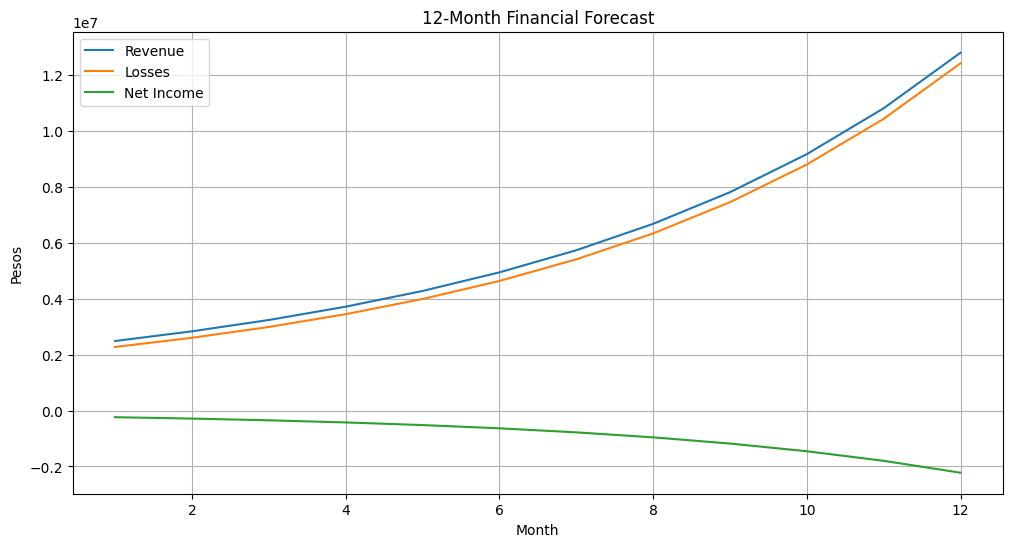

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_forecast['Month'], df_forecast['Revenue'], label='Revenue')
plt.plot(df_forecast['Month'], df_forecast['Losses'], label='Losses')
plt.plot(df_forecast['Month'], df_forecast['Net_Income'], label='Net Income')
plt.xlabel('Month')
plt.ylabel('Pesos')
plt.title('12-Month Financial Forecast')
plt.legend()
plt.grid(True)
plt.show()


### Q3. What changes are required to sustain the business not only throughout the year but in the long run?

**Answer:**

The first priority is to stop scaling loss-making segments. That means slowing down growth on Contigo A immediately, or tightening who qualifies for it.

Second, the DQ rate must improve. If we can move from 13.5% to below 10%, Contigo A becomes viable. This may require better collections, risk scoring, or restructuring product terms.

We should rebalance the product portfolio. Contigo B performs better overall: lower DQ, higher loan size, more margin. Even a modest shift in acquisition focus could tilt unit economics toward profitability.

Finally, the cost structure must improve. Spending 30 pesos per account regardless of risk or repayment potential creates a flat cost curve. A 10–15% cost reduction through automation or efficiency could meaningfully impact margin.

---

#### KPI Change Proposal:

| KPI                        | Current  | Target       | Why It Matters                           |
|---------------------------|----------|--------------|-------------------------------------------|
| DQ Rate (Contigo A)       | 13.5%    | <10%         | Enables segment profitability             |
| Contigo A Growth Rate     | 25% MoM  | <10%         | Reduces compounding losses                |
| Interest Rate (A)         | 15%      | Tier 18–20%  | Offsets higher risk via pricing           |
| Cost per Account          | 30 pesos | ↓10–20%      | Improves operational efficiency           |
| Product Mix: A vs B       | ~33% A   | <25% A       | Focus on healthier, more profitable loans |

---


**Implementation Risks:**

- Slowing growth may contradict investor goals.
- Raising rates on A customers could reduce uptake.
- Cost reduction requires upfront investment in process improvement or tech.
- Lowering DQ rates demands better data, scoring models, and time.

**Conclusion:**

If these changes aren’t made, the startup will continue scaling losses, not profitability. The data clearly shows that the current path is unsustainable without structural change.


In [ ]:
df_forecast.to_excel('net_income_forecast.xlsx', index=False)
